**Introduction**


PCA is a dimensionality Reduction Technique

Principal component analysis, or PCA,  converts data from high dimensional space to low dimensional space by selecting the most important attributes that capture maximum information about the dataset.


**How is PCA different than other feature selection techniques?**

The way PCA is different from other feature selection techniques such as random forest, regularization techniques, forward/backward selection techniques etc is that it does not require class labels to be present (thus called as unsupervised). More details along with Python code example will be shared in future posts.

**Load Libariries & Dataset**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

In [8]:
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
dataset.data.shape # will print size of dataset

(1797, 64)

1797 is total row and 64 is the dimension

**Visualization of Data**

In [13]:
dataset.data[0] # will given first row of data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
dataset.data[0].reshape(8,8) # converting flatten array two dimension array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

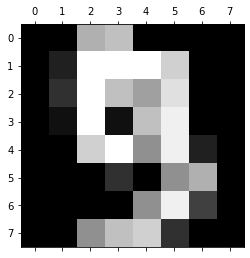

In [28]:
Plotting image
plt.gray() # plotting grey image
plt.matshow(dataset.data[9].reshape(8,8))

Observation : My first digit looks like '0'.

In [26]:
# Lets see target variable
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
dataset.target[9]

9

**Preprocessing**

In [31]:
# creating new dataframe 
df= pd.DataFrame(dataset.data,columns=dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [32]:
df.shape

(1797, 64)

In [34]:
X=df
y=dataset.target

In [36]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler, OneHotEncoder

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

**Train & Test Split & Applying Logistic Regression**

In [37]:
from sklearn.model_selection import train_test_split

# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,
                                                    random_state=30)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1437, 64)
Shape of Test Xs:(360, 64)
Shape of Training y:(1437,)
Shape of Test y:(360,)


In [41]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()
le.fit(x_train,y_train)
accuracy_score=le.score(x_test,y_test)
accuracy_score


0.9722222222222222

**Here we get 97% of accuracy**

**Applying PCA**

In [42]:
from sklearn.decomposition import PCA
pca=PCA(.95) ## taking 95% ofinformation

X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [43]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [45]:

# check how much variance is explained by each principal component
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954 ]


Observation : In Pc1 we are taking 14 % of information ,pc-2 we are taking 13 %  useful information from my dataset and so on

In [47]:
pca.n_components_ # will print number of component or columns

29

**Observation : With PCA while keeping 95 % of information , dimension reduces to 29 from 64.**

In [48]:
from sklearn.model_selection import train_test_split

# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,
                                                    random_state=30)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1437, 29)
Shape of Test Xs:(360, 29)
Shape of Training y:(1437,)
Shape of Test y:(360,)


In [51]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
accuracy_score=model.score(x_test,y_test)
accuracy_score

0.9694444444444444

**Here with PCA(principle component analysis) we get 96.9% of accuracy**

**PCA with n_components**

In [52]:
from sklearn.decomposition import PCA
principal=PCA(n_components=3) ## taking 95% ofinformation

X_pca1=principal.fit_transform(X)
X_pca1.shape

(1797, 3)

In [54]:
# check how much variance is explained by each principal component
print(pca.explained_variance_ratio_)
pca.n_components_ # will print number of component or columns

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954 ]


29

In [55]:
from sklearn.model_selection import train_test_split

# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_pca1,y,test_size=0.2,
                                                    random_state=30)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1437, 3)
Shape of Test Xs:(360, 3)
Shape of Training y:(1437,)
Shape of Test y:(360,)


In [56]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
accuracy_score=model.score(x_test,y_test)
accuracy_score

0.675

**Accuaracy will decrease as we  have loss so many information by reducing number of columns = 3.**

**In this notebook i used concept of PCA (Feature Extraction) to study the dataset and find accuracy**

**Thanks!**